Para este ejercicio se utilizara un archivo csv con datos de entrada a modo de ejemplo para clasificar si el usuario que visita un sitio web usa como sistema operativo Windows, Macintosh o Linux. Nuestra información de entrada son las siguientes 4 características:

    * Duración de visita en segundos.
    * Cantidad de páginas visitadas durante la sesión.
    * Cantidad de acciones del usuario (click, scroll, uso de checkbox, etc).
    * Suma del valor de las acciones (cada acción lleva asociada una valoración de importancia).

La salida sera discreta, asignaremos los siguientes valores a las etiquetas:

    0 - Windows
    1 - Macintosh
    2 - Linux

Nota: La muestra es pequeña (170 registros), pero recordamos que para conseguir buenos resultados siempre es mejor contar con un número abundante de datos que darán mayor exactitud a las predicciónes.

In [18]:
# Importa las librerias de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [19]:
# Carga los datos de entrada
data = pd.read_csv('usuarios_win_mac_lin.csv')
data.head(10)

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
5,125.0,5,10,20,2
6,133.0,2,2,4,2
7,162.0,2,6,12,2
8,170.0,2,4,8,2
9,217.0,2,6,6,2


In [20]:
# Muestra la cantidad de filas y columnas del dataset
data.shape

(170, 5)

# Contenido del dataframe

El dataframe esta constituido por 170 filas y 5 columnas, las cuales son:

    * duracion: duración de la visita en segundos
    * paginas: cantidad de pagínas visitadas
    * acciones: cantidad de acciones realizada por el usuario (clic, scroll, uso de checkbox, etc)
    * valor: suma del valor de las acciones (cada acción lleva asociada una valoración de importancia)
    * clase: sistema operativo que usa el usuario 
        0 - Windows
        1 - Macintosh
        2 - Linux

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [22]:
data.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [23]:
# Muestra la cantidad de datos faltantes
data.isnull().sum()

duracion    0
paginas     0
acciones    0
valor       0
clase       0
dtype: int64

In [24]:
# Muestra la cantidad de datos por clase
data.groupby('clase').size()

clase
0    86
1    40
2    44
dtype: int64

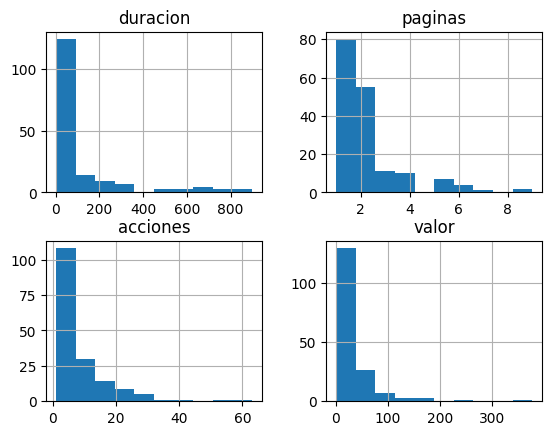

In [25]:
data.drop(['clase'],axis=1).hist()
plt.show()

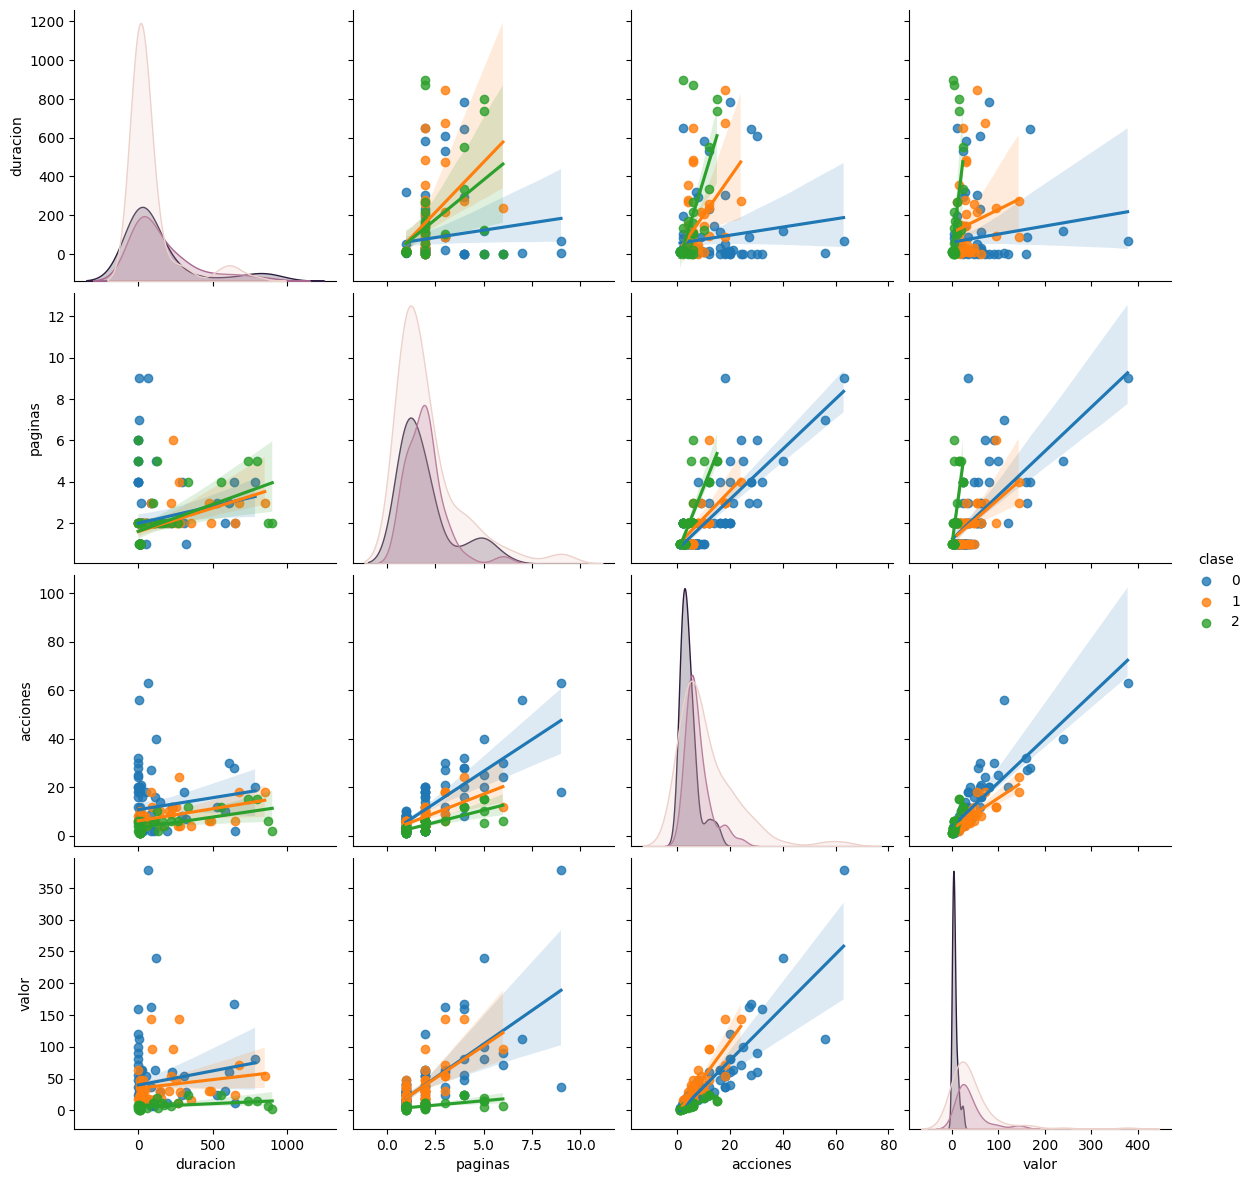

In [26]:
sns.pairplot(data, hue='clase',size=3,vars=["duracion","paginas","acciones","valor"],kind='reg')

## Creación del modelo de regresión logística

In [27]:
# Crea el conjunto de entrada y la salida
X = np.array(data.drop(['clase'],axis=1))
y = np.array(data['clase'])

In [28]:
# Crea el modelo
modelo = linear_model.LogisticRegression()

# Entrenamiento del modelo
modelo = modelo.fit(X,y)

In [29]:
# Clasificación del conjunto de entrada X
predicciones = modelo.predict(X)
predicciones

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
# devuelve la precisión del modelo
modelo.score(X,y)

0.7823529411764706

## Validación del modelo

A continuación se subdividira el conjunto de datos de entrada en un set de entrenamiento y otro para validar el modelo. Esto evitará problemas en los que nuestro algoritmo pueda fallar por sobregeneralizar el conocimiento. Para ello, dividimos nuestros datos de entrada en forma aleatoria utilizando 80% de registros para entrenamiento y 20% para testear.

In [31]:
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size= 0.20, random_state=seed)

In [ ]:
nombre = 'Regresión logistica'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(modelo, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = (nombre, cv_results.mean(), cv_results.std())
msg

('Regresión logistica',
 np.float64(0.7285714285714284),
 np.float64(0.09418550477897196))